In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid') # Using a seaborn style for matplotlib

In [3]:
try:
    df = pd.read_csv('dataset1.csv')
except FileNotFoundError:
    print("Dataset file 'healthcare-dataset-stroke-data.csv' not found. Please download it from Kaggle and place it in the same directory.")
    # You might want to exit or provide a dummy df for the rest of the notebook to run
    df = pd.DataFrame() # Empty dataframe if file not found

print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [6]:
median_bmi = df['bmi'].median()
df['bmi'].fillna(median_bmi, inplace=True)
print(f"\nMissing 'bmi' values imputed with median: {median_bmi}")


Missing 'bmi' values imputed with median: 28.1


C:\Users\krish\AppData\Local\Temp\ipykernel_4856\585860939.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(median_bmi, inplace=True)


In [7]:
print("\nGender distribution:")
print(df['gender'].value_counts())


Gender distribution:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [8]:
df = df[df['gender'] != 'Other']
print("\nRemoved 'Other' gender. New gender distribution:")
print(df['gender'].value_counts())


Removed 'Other' gender. New gender distribution:
gender
Female    2994
Male      2115
Name: count, dtype: int64


In [9]:
df.drop('id', axis=1, inplace=True)
print("\nDropped 'id' column.")


Dropped 'id' column.


In [10]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [11]:
print("\nCleaned dataset head:")
df.head()


Cleaned dataset head:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


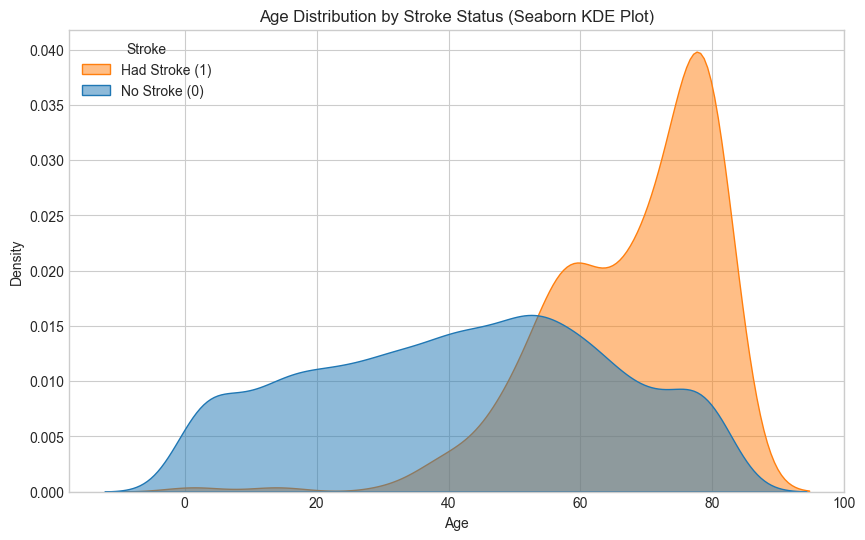

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='stroke', fill=True, common_norm=False, alpha=0.5)
plt.title('Age Distribution by Stroke Status (Seaborn KDE Plot)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Stroke', labels=['Had Stroke (1)', 'No Stroke (0)']) # Manual legend for clarity
plt.show()

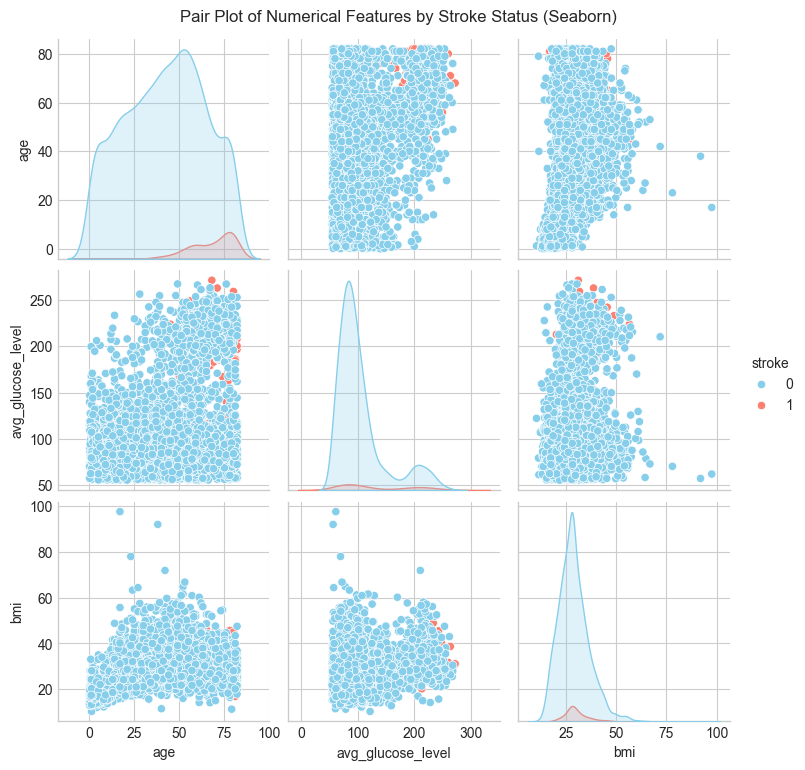

In [13]:
numerical_features_for_pairplot = ['age', 'avg_glucose_level', 'bmi', 'stroke']
sns.pairplot(df[numerical_features_for_pairplot], hue='stroke', diag_kind='kde', palette={0: 'skyblue', 1: 'salmon'})
plt.suptitle('Pair Plot of Numerical Features by Stroke Status (Seaborn)', y=1.02)
plt.show()

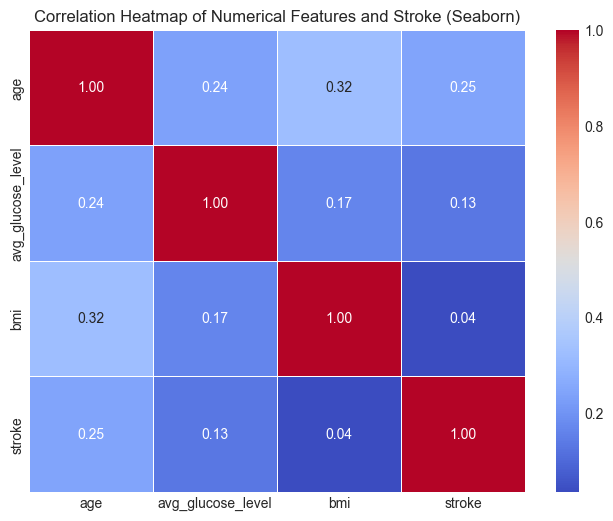

In [14]:
correlation_matrix = df[['age', 'avg_glucose_level', 'bmi', 'stroke']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features and Stroke (Seaborn)')
plt.show()

In [15]:
fig_scatter_plotly = px.scatter(df,
                                x='age',
                                y='avg_glucose_level',
                                color='stroke',
                                color_discrete_map={0: 'blue', 1: 'red'},
                                title='Interactive: Age vs. Avg. Glucose Level by Stroke Status',
                                labels={'age': 'Age', 'avg_glucose_level': 'Average Glucose Level', 'stroke': 'Stroke Status'},
                                hover_data=['bmi', 'gender', 'smoking_status']) # Add more info on hover

fig_scatter_plotly.update_layout(legend_title_text='Stroke Status')
fig_scatter_plotly.show()

In [16]:
df_risk_factors = df.groupby(['hypertension', 'heart_disease', 'stroke']).size().reset_index(name='count')
df_risk_factors['hypertension'] = df_risk_factors['hypertension'].map({0: 'No Hypertension', 1: 'Has Hypertension'})
df_risk_factors['heart_disease'] = df_risk_factors['heart_disease'].map({0: 'No Heart Disease', 1: 'Has Heart Disease'})
df_risk_factors['stroke'] = df_risk_factors['stroke'].map({0: 'No Stroke', 1: 'Stroke'})


fig_stacked_bar = px.bar(df_risk_factors,
                         x='hypertension',
                         y='count',
                         color='stroke',
                         facet_col='heart_disease',
                         barmode='group', # or 'stack' for stacked view
                         title='Stroke Occurrences by Hypertension and Heart Disease Status',
                         labels={'count': 'Number of Patients', 'hypertension': 'Hypertension Status'},
                         color_discrete_map={'No Stroke': 'green', 'Stroke': 'purple'})

fig_stacked_bar.update_layout(legend_title_text='Stroke Outcome')
fig_stacked_bar.show()


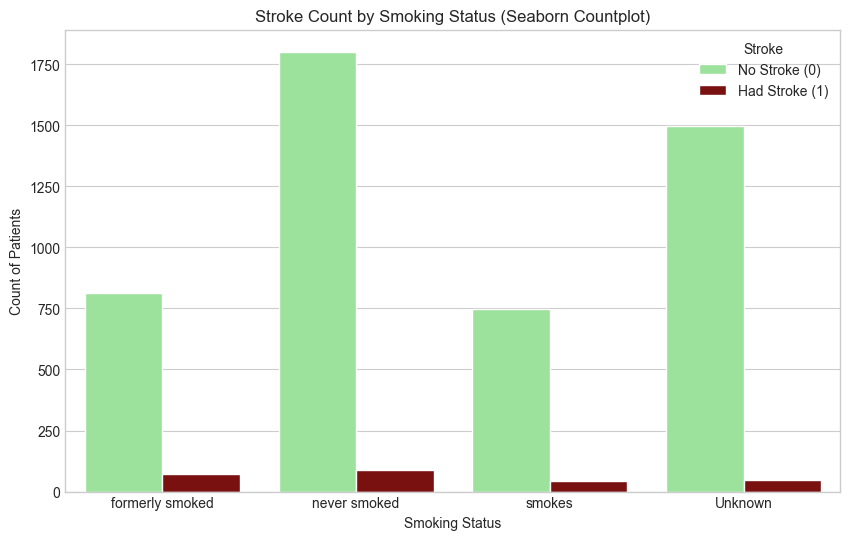

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_status', hue='stroke', palette={0: 'lightgreen', 1: 'darkred'})
plt.title('Stroke Count by Smoking Status (Seaborn Countplot)')
plt.xlabel('Smoking Status')
plt.ylabel('Count of Patients')
plt.legend(title='Stroke', labels=['No Stroke (0)', 'Had Stroke (1)'])
plt.show()


# Conclusions from the Analysis

1. **Age is a Dominant Risk Factor:**  
    - The age distribution analysis (KDE plot, pair plot) consistently showed that older individuals (typically >60 years) have a significantly higher incidence of stroke.  
    - This was also confirmed by the positive correlation between age and stroke (`correlation_matrix.loc['age', 'stroke'] ≈ 0.25`).

2. **Key Numerical Features and Stroke:**  
    - **Average Glucose Level:** Higher average glucose levels are associated with an increased likelihood of stroke, as seen in the correlation heatmap (`correlation_matrix.loc['avg_glucose_level', 'stroke'] ≈ 0.13`) and interactive scatter plot.
    - **BMI:** The relationship between BMI and stroke was less pronounced in this dataset once missing values were imputed (median BMI = 28.1). While there was a very slight positive correlation (`correlation_matrix.loc['bmi', 'stroke'] ≈ 0.04`), it wasn't as strong a predictor as age or glucose levels in this specific analysis.

3. **Pre-existing Conditions and Lifestyle:**  
    - **Hypertension and Heart Disease:** Both conditions are strong indicators of increased stroke risk. Patients having both hypertension and heart disease showed the highest *proportion* of stroke occurrences (see Plotly grouped bar chart).
    - **Smoking Status:** Individuals who "formerly smoked" or currently "smoke" demonstrated a higher proportion of strokes compared to those who "never smoked" (see Seaborn count plot).

---

### Anomalies & Further Exploration

- The "Unknown" category in `smoking_status` is quite large. Understanding why this information is missing or trying to impute it (if appropriate and possible) could provide more clarity.
- While BMI's direct correlation was weak, its interaction with other factors (e.g., high BMI in conjunction with hypertension) could be explored further, perhaps with more complex models or visualizations.

---

### Limitations

- This is an observational study; correlation does not imply causation.
- The dataset has a significant class imbalance (many more non-stroke patients than stroke patients), which can affect some interpretations if not accounted for in predictive modeling (though less critical for this EDA).
- BMI imputation using the median is a simplification. More sophisticated imputation methods could be used.

---

**Overall, the visualizations effectively highlighted key patterns and supported our initial hypotheses regarding stroke risk factors. Interactive plots, like those from Plotly, were particularly useful for dynamic exploration of data points and their associated attributes.**
